In [1]:
from sympy import *
from sympy.physics.units import *
from spb import *
import numpy as np
from matplotlib import pyplot as plt
import tabulate
from IPython.display import Markdown as md

def simplify(expr):
    return convert_to(expr, [kg, meter, second, K, coulomb]).simplify()


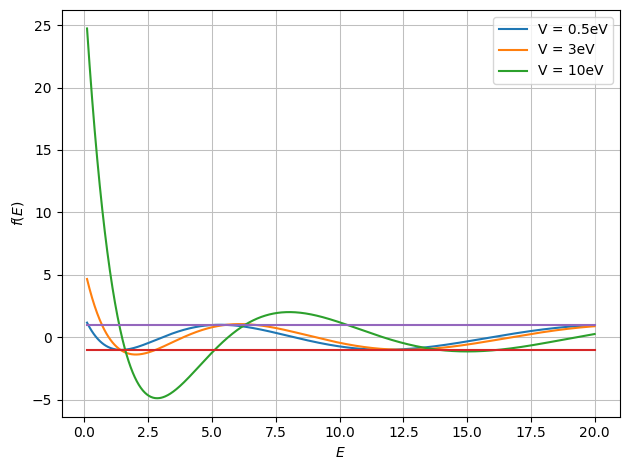

In [7]:
# problem parameters
E_eV = symbols('E', real=True)
E = E_eV * eV
V = symbols('V', real=True)

m = 9.1 * 10**-31 * kg
a = 0.54 * nm
w = 0.70 * a
z = a - w

# solving
alpha = sqrt(2 * m * (V - E)) / hbar
beta = sqrt(2 * m * E) / hbar

f_E = cos (beta * w) * cosh(alpha * z) + 1 / 2 * (alpha / beta - beta / alpha) * sin(beta * w) * sinh(alpha * z)
 
plot(
    simplify(f_E.subs({V: 0.5 * eV})), 
    simplify(f_E.subs({V: 3 * eV})), 
    simplify(f_E.subs({V: 10 * eV})), 
    -1, 1, (E_eV, 0.1, 20), 
    label = ["V = 0.5eV", "V = 3eV", "V = 10eV", None, None]
)

V = 0.5 eV


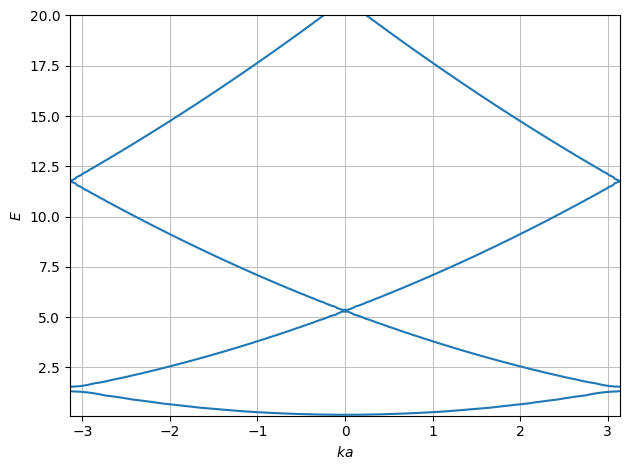

V = 3 eV


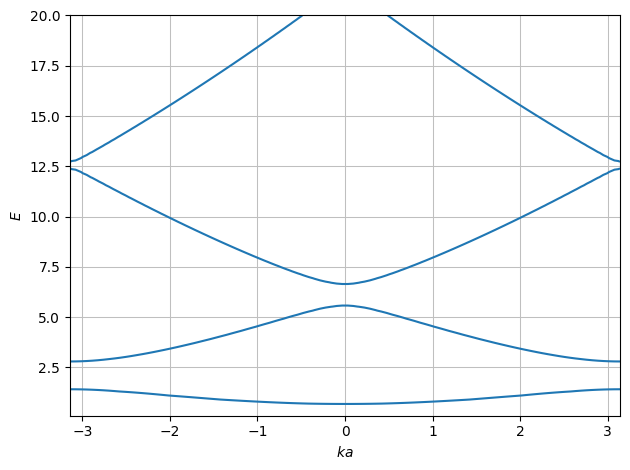

V = 10 eV


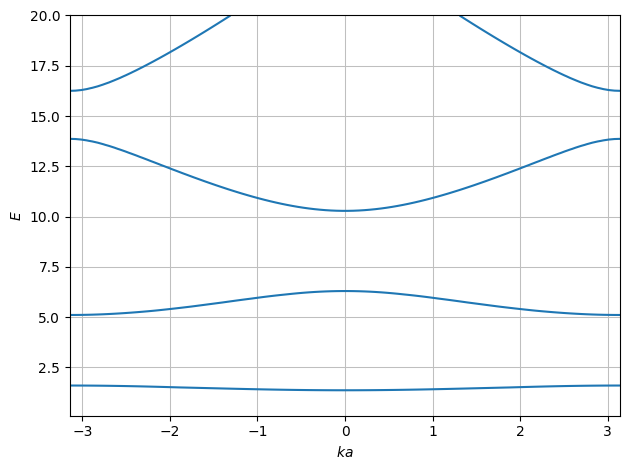

In [8]:
ka = symbols('ka', real=True)

for barrier_voltage in [0.5, 3, 10]:
    print(f"V = {barrier_voltage} eV")
    plot_implicit(Eq(simplify(f_E.subs({V: barrier_voltage * eV})), cos(ka)), (ka, -pi, pi), (E_eV, 0.1, 20))

In [35]:
# find d^2 / dk^2 of f(E) = cos(ka)
k = acos(f_E) / a
k_invnm = k * nm

# https://calculus.subwiki.org/wiki/Second_derivative_rule_for_inverse_function

dk_dE = diff(k_invnm, E_eV)
d2k_dE2 = diff(dk_dE, E_eV)

d2E_dk2 = - d2k_dE2 / (dk_dE ** 3)


In [36]:
simplify(d2E_dk2.evalf(subs={E_eV: 5.5, V: 3 * eV})).evalf()

-0.863942046713558

In [37]:
-0.863942046713558 * 

SyntaxError: invalid character '−' (U+2212) (1037660157.py, line 1)

In [46]:
convert_to(simplify(((hbar**2/(-0.863942046713558 * eV * nm *nm))/2)), electron_rest_mass).evalf()

-0.0440999732638093*electron_rest_mass